## 7. Sympy

This notebook will explore the **symbolic mathematics** library for Python, called [Sympy](https://www.sympy.org/en/index.html).

**What is symbolic mathematics**

 * Mathematical objects represented on computers faithfully.
 * Routines to manipulate those mathematical objects faithfully. 
 
**What symbolic mathematics do we know in Python, so far?**

 * Integers
 
**What are examples of mathematics in Python that is not proper symbolic mathematics?**

 * Floating point numbers

In [42]:
## Before we go too far let's demonstrate why integers are symbolic
## and floating point numbers are not

def f(x):
    r = 2*x
    while r>= 1:
        r -= 1
    while r<0:
        r += 1
    return(r)



In [11]:
x = 1/3
for i in range(53):
    x = f(x)
print(x)

0.5


In [3]:
## if you use floats, you could get this erroneous result
## and maybe conclude that (1/3) times an integer power of 2 is an
## integer. 

import math as ma
print(ma.pi)
x = ma.pi
for i in range(47):
    x = f(x)
print(x)

3.141592653589793
0.5


**Fact** The only numbers where $f^{(k)}(x)=0$ are the numbers of
 the form $$x = \frac{p}{2^q}$$
 with $p$ and $q$ integers.

In [148]:
## on the other hand, integers are faithful (symbolic)
x = 1
for i in range(200):
    x *= 2
print(x)

1606938044258990275541962092341162602522202993782792835301376


In [12]:
## fractions library
import fractions as fr
x = fr.Fraction(1,5) ## i.e. 1/3
print(x)

1/5


In [13]:
for i in range(5):
    print(x)
    x = f(x)

1/5
2/5
4/5
3/5
1/5


In [20]:
## Sympy can do this as well
import sympy as sp
x = sp.Integer(1)/sp.Integer(3)
for i in range(5):
    print(x)
    x = f(x)

1/3
2/3
1/3
2/3
1/3



## What might we want Symbolic mathematics for?

* Complex numbers

* Matrices

* Describing functional relations

$$f(x) = \frac{e^x}{x^2+2x+1}$$

* Doing calculus $f'(x)$, more generally, manipulating functional relations.

* Finding solutions of equations in closed form $f(x)=0$.

* Finding solutions to differential equations in closed form $f''+3xf'+3 = 0$.

* Doing tedious algebraic gruntwork. . . for example, setting up complex differential equations.

* There are many problems that need more sophisticated data types to solve, eg: knotting, symmetry, etc. . .



In [23]:
## some of the most basic data types, like complex numbers
## you don't need sympy for, there's seperate libraries

import cmath as cm

z = 1+2j
print(z**(-1))

(0.2-0.4j)


In [24]:
x = sp.Symbol('theta') ## Python will think of the variable as x
 ## it will print it as the string 'x'
sp.pprint(x)
y = sp.Symbol('mynumber')
sp.pprint(y)

θ
mynumber


In [38]:
x=sp.Symbol('xi')
p = x**3 - 3*x + 2
sp.pprint(p) ## sp.pprint is the Sympy "pretty print" command
print(p)

 3          
ξ  - 3⋅ξ + 2
xi**3 - 3*xi + 2


In [39]:
sp.pprint( sp.diff(p, x) )

   2    
3⋅ξ  - 3


In [40]:
sp.pprint( sp.integrate(p, (x, 1, 2) )) ## with endpoint
 ## definite integral
sp.pprint( sp.integrate(p, x)) ## indef integral

5/4
 4      2      
ξ    3⋅ξ       
── - ──── + 2⋅ξ
4     2        


In [157]:
x = sp.sqrt(2) - 1
sp.pprint(x)

-1 + √2


In [43]:
for i in range(60):
    x = f(x)
sp.pprint(x)
print(x.evalf()) ## float approx to Sympy expression

TypeError: cannot determine truth value of Relational

## Calculus in Sympy

In [44]:
x = sp.Symbol('x')
f = sp.sin(x**2)
sp.pprint(f)

   ⎛ 2⎞
sin⎝x ⎠


In [45]:
F = sp.integrate(f, x)

In [46]:
sp.pprint(F)

                ⎛√2⋅x⎞       
3⋅√2⋅√π⋅fresnels⎜────⎟⋅Γ(3/4)
                ⎝ √π ⎠       
─────────────────────────────
           8⋅Γ(7/4)          


In [47]:
?sp.fresnels

Init signature: sp.fresnels(z)
Docstring:     
Fresnel integral S.

This function is defined by

.. math:: \operatorname{S}(z) = \int_0^z \sin{\frac{\pi}{2} t^2} \mathrm{d}t.

It is an entire function.

Examples

>>> from sympy import I, oo, fresnels
>>> from sympy.abc import z

Several special values are known:

>>> fresnels(0)
0
>>> fresnels(oo)
1/2
>>> fresnels(-oo)
-1/2
>>> fresnels(I*oo)
-I/2
>>> fresnels(-I*oo)
I/2

In general one can pull out factors of -1 and `i` from the argument:

>>> fresnels(-z)
-fresnels(z)
>>> fresnels(I*z)
-I*fresnels(z)

The Fresnel S integral obeys the mirror symmetry
`\overline{S(z)} = S(\bar{z})`:

>>> from sympy import conjugate
>>> conjugate(fresnels(z))
fresnels(conjugate(z))

Differentiation with respect to `z` is supported:

>>> from sympy import diff
>>> diff(fresnels(z), z)
sin(pi*z**2/2)

Defining the Fresnel functions via an integral

>>> from sympy import integrate, pi, sin, gamma, expand_func
>>> integrate(sin(pi*z**2/2), z)
3*fresnels(z)*

In [54]:
## this is called a "special function" 
## sympy knows its name

sp.fresnelc(2).evalf(40)

0.4882534060753407545002235033572610376884

In [63]:
import numpy as np
import matplotlib.pyplot as plt

X  = np.linspace(-4*np.pi, 4*np.pi, 1000)
Y1 = np.array( [sp.fresnelc(x).evalf() for x in X] )
Y2 = np.array( [sp.fresnels(x).evalf() for x in X] )

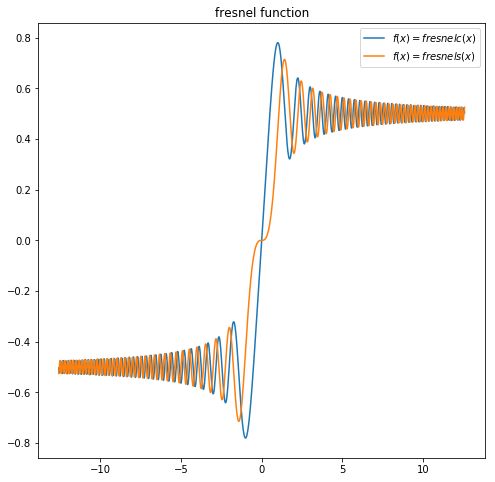

In [66]:
plt.figure(figsize=(8,8))
plt.title("fresnel function")
plt.plot(X, Y1,label="$f(x)=fresnelc(x)$")
plt.plot(X, Y2,label="$f(x)=fresnels(x)$")
plt.legend()
plt.savefig('fresnels.png')
plt.show()

## Equality

One problem with symbolic mathematics packages is checking equality
of two objects is often difficult. 

In [166]:
LHS = 1/(sp.sqrt(2)-1)
RHS = sp.sqrt(2)+1
sp.pprint(LHS)
sp.pprint(RHS)

   1   
───────
-1 + √2
1 + √2


In [167]:
print(LHS==RHS)

False


In [168]:
## purpose here is that == 
## does not check equality at the mathematical level
## what it does do is check if you are using the same
## exact syntax to express this object

print(type(RHS))
print(type(LHS))

<class 'sympy.core.add.Add'>
<class 'sympy.core.power.Pow'>


In [169]:
## i.e. the type is the the LAST operation used in the
## construction of this object

print(sp.srepr(LHS))
print(LHS.func)
sp.pprint(LHS.args)

Pow(Add(Integer(-1), Pow(Integer(2), Rational(1, 2))), Integer(-1))
<class 'sympy.core.power.Pow'>
(-1 + √2, -1)


In [170]:
## the sp.srepr command
## this gives us Sympy's internal syntax for the object

## Pow expression contains 2 to the 1/2 power
##  sqrt(2) - 1
##  (sqrt(2) - 1)^(-1)

## this is called an Expression Tree

exprl = [sp.sqrt(2), sp.sqrt(2)-1, 1/(sp.sqrt(2)+1)]
for l in exprl:
    sp.pprint(l)
    print(type(l))
    print(sp.srepr(l), "\n")

√2
<class 'sympy.core.power.Pow'>
Pow(Integer(2), Rational(1, 2)) 

-1 + √2
<class 'sympy.core.add.Add'>
Add(Integer(-1), Pow(Integer(2), Rational(1, 2))) 

  1   
──────
1 + √2
<class 'sympy.core.power.Pow'>
Pow(Add(Integer(1), Pow(Integer(2), Rational(1, 2))), Integer(-1)) 



A sympy algebraic expression is stored internally in what is known as a **rooted tree**.

<div style="display: inline-block; margin-right: 12px; margin-left: 50px">
<img src="images/tree1.png" width="150" height="150" class="alignleft" title="sqrt(2)"/></div>
<div style="display: inline-block; margin-right: 12px; margin-left: 50px">
<img src="images/tree2.png" width="250" height="250" class="alignleft" title="sqrt(2)-1"/></div>
<div style="display: inline-block; margin-right: 12px; margin-left: 50px">
<img src="images/tree3.png" width="300" height="300" class="alignleft" title="1/(1+sqrt(2))"/></div>

* The **final** operation in the expression is the **base** or **root** of the tree, which is what we see when we request the **type**.

* When one calls the equality "==" operation in Python for sympy expressions, Python checks to see if the expression trees are identical.

* Sympy will perform the most *elementary* simplifications automatically, such as $\frac{\sqrt{2}}{2} = \frac{1}{\sqrt{2}}$. The term *elementary* should be taken to mean the simplifications that cost Python essentially no time or processing power. Sympy only attempts this for objects where a *canonical form* is known.

* Checking equality of more complicated expressions involves more computation, quite often because there is *no* canonical form.

The internal tree structure to a sympy object is expressible with the <a href="http://docs.sympy.org/latest/tutorial/manipulation.html">*srepr*</a> command. One can access the root with the **func** call, and the children of the root with the **args** list.

~                                       

In [171]:
x = sp.sqrt(2)
y = 2/sp.sqrt(2)
print(x==y)

True


In [172]:
## sympy does do some "elementary" simplifications
sp.pprint(x)
sp.pprint(y)
print(x==y)

√2
√2
True


In [173]:
x = sp.Symbol('x')
a,b,c = sp.symbols('a b c')
p = a*x**2 + b*x + c
sp.pprint(p)

   2          
a⋅x  + b⋅x + c


In [174]:
sp.pprint(sp.solve(p, x))

⎡        _____________   ⎛       _____________⎞ ⎤
⎢       ╱           2    ⎜      ╱           2 ⎟ ⎥
⎢-b + ╲╱  -4⋅a⋅c + b    -⎝b + ╲╱  -4⋅a⋅c + b  ⎠ ⎥
⎢─────────────────────, ────────────────────────⎥
⎣         2⋅a                     2⋅a           ⎦


In [175]:
a,b,c,d = sp.symbols('a b c d')
p = a*x**3 + b*x**2+c*x+d
#sp.pprint(sp.solve(p, x))

In [176]:
## we can also solve multi-variable equations
y = sp.Symbol('y')
EQ = [x**2+y**2-4, x*y-1]
## when you ask Sympy to solve eqn it assume f(x)=0 is what
## you want to solve for. 
sol = sp.solve(EQ)
sp.pprint(sol)

⎡⎧   ⎛       _________⎞   _________ ⎛    _________    ⎞        _________⎫  ⎧  
⎢⎨x: ⎝-2 - ╲╱ -√3 + 2 ⎠⋅╲╱ -√3 + 2 ⋅⎝- ╲╱ -√3 + 2  + 2⎠, y: -╲╱ -√3 + 2 ⎬, ⎨x:
⎣⎩                                                                      ⎭  ⎩  

  ⎛       _________⎞   _________ ⎛  _________    ⎞       _________⎫  ⎧   ⎛    
 -⎝-2 + ╲╱ -√3 + 2 ⎠⋅╲╱ -√3 + 2 ⋅⎝╲╱ -√3 + 2  + 2⎠, y: ╲╱ -√3 + 2 ⎬, ⎨x: ⎝-2 -
                                                                  ⎭  ⎩        

   ________⎞   ________ ⎛    ________    ⎞        ________⎫  ⎧    ⎛       ____
 ╲╱ √3 + 2 ⎠⋅╲╱ √3 + 2 ⋅⎝- ╲╱ √3 + 2  + 2⎠, y: -╲╱ √3 + 2 ⎬, ⎨x: -⎝-2 + ╲╱ √3 
                                                          ⎭  ⎩                

____⎞   ________ ⎛  ________    ⎞       ________⎫⎤
+ 2 ⎠⋅╲╱ √3 + 2 ⋅⎝╲╱ √3 + 2  + 2⎠, y: ╲╱ √3 + 2 ⎬⎥
                                                ⎭⎦


In [177]:
## solutions generally are a list of dictionary objects
## dictionary objects are always of form
## (sympy variable, value of that variable)
sp.pprint(sol[1])

⎧    ⎛       _________⎞   _________ ⎛  _________    ⎞       _________⎫
⎨x: -⎝-2 + ╲╱ -√3 + 2 ⎠⋅╲╱ -√3 + 2 ⋅⎝╲╱ -√3 + 2  + 2⎠, y: ╲╱ -√3 + 2 ⎬
⎩                                                                    ⎭


In [178]:
for v in sol[1].keys():
    print(v, sol[1][v].evalf())

x 1.93185165257814
y 0.517638090205041


(-3, 3)

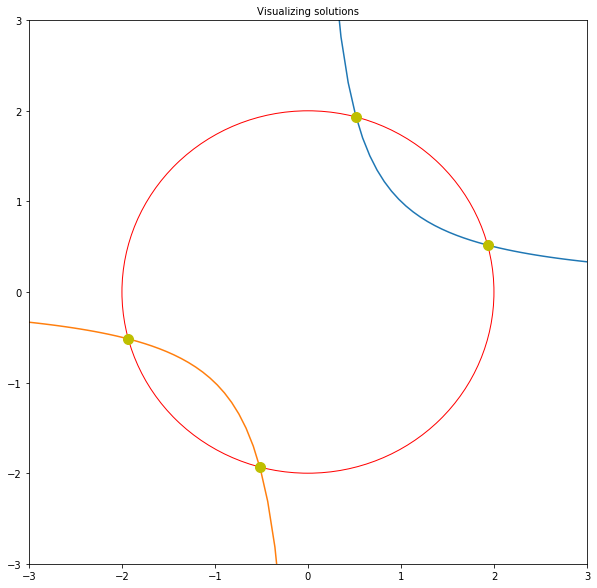

In [179]:
## Let's try to plot the solutions
fig, ax = plt.subplots(figsize=(10,10)) ## big plot!
circle = plt.Circle( (0,0), 2, color='r', fill=False)
x1 = np.linspace(0.2, 4) ## for plotting the hyperbola
y1 = x1**(-1)
ax.plot(x1, y1, '-') ## upper blue hyperbola

x2 = np.linspace(-4, -0.2)
y2 = x2**(-1)
ax.plot(x2, y2, '-') ## lower orange hyperbola

ax.set_title('Visualizing solutions', fontsize=10) ## big font

## yellow dots for the intersection i.e. the solution.
ax.plot([sol[i][x].evalf() for i in range(len(sol))],\
       [sol[i][y].evalf() for i in range(len(sol))], 'yo', markersize=10)

fig.gca().add_artist(circle)
ax.set_xlim(-3,3)
ax.set_ylim(-3,3)

## Let's apply Sympy to implement Newton's method

Newton's method is the technique of iteratively using the linear approximation of a function to search for roots.  Say we want to find a solution to the equation

$$f(x) = 0$$

where, $f$ is a real-valued function of a real variable $f : \mathbb R \to \mathbb R$.

Start with an initial guess $x_0 \in \mathbb R$. The linear approximation $L$ at $x_0$ (to $f$) is the function

$$L_{x_0}(x) = f(x_0) + f'(x_0)(x-x_0).$$

Rather than trying to solve $f(x)=0$ we solve $L_{x_0}(x)=0$, which gives us

$$x = x_0-\frac{f(x_0)}{f'(x_0)}.$$

Newton's method is the process of replacing the initial guess $x_0$ with the solution to $L_{x_0}(x) = 0$, i.e.

$$x_0 \longmapsto x_0-\frac{f(x_0)}{f'(x_0)}.$$

The function that sends $x_0$ to $x_0 -\frac{f(x_0)}{f'(x_0)}$ is called the **Newton iterate**, let's call this function $N_f$, i.e.

$$N_f(x) = x - \frac{f(x)}{f'(x)}.$$

* * *

For example, if $f(x) = x^2 - c$, then solving $f(x) = 0$ is equivalent to computing a square root of $c$.  On the other hand, the *Newton iterate* is the function

$$N_f(x) = x - \frac{x^2 - c}{2x} = \frac{x}{2} + \frac{c}{2x}.$$

This illustrates the compromise made with Newton's method: if one does not have a convenient direct way to compute square roots, one can get a good approximation by iteratively computing $N_f$, which uses only the operations of addition, multiplication and division.

* * *

As an initial exercise, let's use Sympy to compute the Newton iterates of functions.  We will then make a plot of $f$, $N$ as well as applications of the Newton iterate to some initial guesses.



In [180]:
f = sp.Function('f')
x = sp.Symbol('x')
N = x - f(x)/f(x).diff(x)
sp.pprint(N)

      f(x)  
x - ────────
    d       
    ──(f(x))
    dx      


In [181]:
c = sp.Symbol('c')
## newton iterator for F = x^2 - c
Nsq = N.subs(f(x), x**2-c)
sp.pprint(Nsq)

            2  
      -c + x   
x - ───────────
    ∂ ⎛      2⎞
    ──⎝-c + x ⎠
    ∂x         


In [182]:
## notice .diff(x) is passive
Nsq = (sp.simplify(Nsq.doit()))

In [183]:
sp.pprint(sp.Eq(sp.Symbol('N'),Nsq ))

         2
    c + x 
N = ──────
     2⋅x  


In [184]:
## Let's try iterating this, for c=2. 
## try computing sqrt(2)
Nsq2 = Nsq.subs(c,2)
sp.pprint(Nsq2)

 2    
x  + 2
──────
 2⋅x  


In [185]:
## convert a sympy expression into a callable function
Nsq2(3)
## sympy expressions are formal symbols, Python does not imagine them
## to be callable functions

TypeError: 'Mul' object is not callable

In [186]:
## the most primitive is subs(x,number)
sp.pprint(Nsq2.subs(x, sp.pi).evalf())

1.88910621297869


In [187]:
## this is not a good idea if you want to do this more than once a second.
## the next next best is the lambdify command
IT = sp.lambdify(x, Nsq2)

In [188]:
IT(3.14)

1.8884713375796178

In [189]:
x = 1.0
for i in range(5):
    print(x - ma.sqrt(2))
    x = IT(x)

-0.41421356237309515
0.08578643762690485
0.002453104293571595
2.1239014147411694e-06
1.5947243525715749e-12


In [190]:
import math as ma
print(ma.sqrt(2))

1.4142135623730951


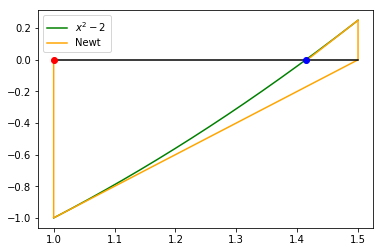

In [191]:
## want to investigate Newton's method more globally
## for a function f(x) I want to plot whole function
## for initial guess x_0 plot on the x-axis, 
## plot also all the Newton iterates. 
x = sp.Symbol('x')

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## initial plot will be for sqrt(2)
F = sp.lambdify(x, x**2-2)

## x coordinates
xl = [1.0]
yl = [0.0]

## next pt will be point on graph. 
## then we plot the tangent line from that point to the zero of tangent line
## repeat

for i in range(4):
    xl.append(xl[-1])
    yl.append(F(xl[-1]))
    xl.append(IT(xl[-1]))
    yl.append(0.0)
    
## plot x^2 - 2 fcn
dom = np.linspace(min(xl), max(xl), 1000)
plt.plot(dom, [F(x) for x in dom], color="green", label="$x^2-2$")
plt.plot(xl, yl, color="orange", label="Newt")
plt.plot(dom, [0 for x in dom], color="black")
plt.legend()
## starting point
plt.plot([xl[0]], [yl[0]], 'ro')
plt.plot([xl[-1]], [yl[-1]], 'bo')

In [192]:
f=sp.sin(x)
sp.pprint(f.diff(x))

cos(x)


In [193]:
## f is a sympy functional expression
## the variable will be x.
## x0 is the initial guess (a float)
## n is the number of steps you want to see.
def plotNewt(f, x, x0, n):
    F = sp.lambdify(x, f)
    N = x - f/f.diff(x)
    IT = sp.lambdify(x, N)
    
    xl = [x0]
    yl = [F(x0)]

    ## next pt will be point on graph. 
    ## then we plot the tangent line from that point to the zero of tangent line
    ## repeat

    for i in range(n):
        xl.append(xl[-1])
        yl.append(F(xl[-1]))
        xl.append(IT(xl[-1]))
        yl.append(0.0)
    
    ## plot x^2 - 2 fcn
    plt.figure(figsize=(10,10))
    dom = np.linspace(min(xl)-0.5, max(xl)+0.5, 1000)
    plt.plot(dom, [F(x) for x in dom], color="green", label='$'+sp.latex(f)+'$')
    plt.plot(xl, yl, color="orange", label="Newt")
    plt.plot(dom, [0 for x in dom], color="black")
    ## starting point
    plt.plot([xl[0]], [yl[0]], 'ro', label="init")
    plt.plot([xl[-1]], [yl[-1]], 'bo', label="end")
    plt.legend()
    

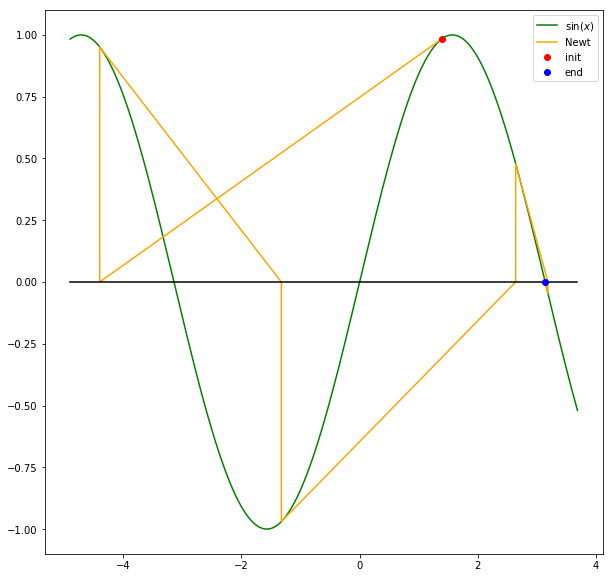

In [194]:
plotNewt(sp.sin(x), x, 1.4, 5)

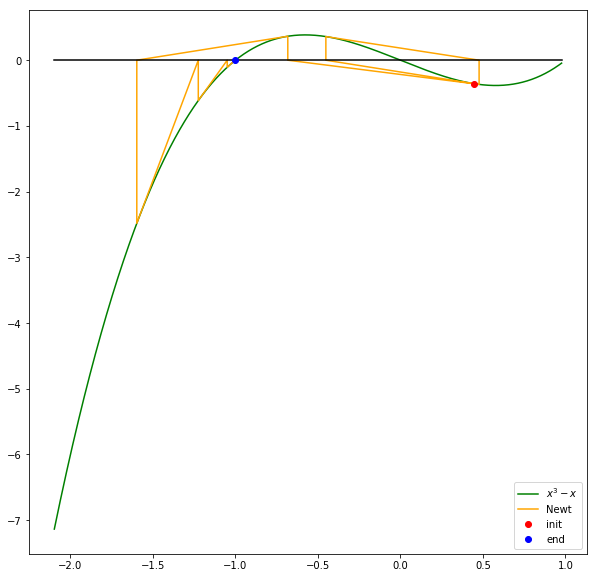

In [195]:
plotNewt(x**3-x, x, 0.448, 20)

In [196]:
f = sp.sqrt(x)
sp.pprint(f)

√x


In [197]:
f(4)

TypeError: 'Pow' object is not callable

In [ ]:
F = sp.lambdify(x, f)

In [198]:
F(4)

14

In [199]:
## look up "ufuncify" command -- compiles the sympy expression with a C compiler

## Complex answers

in Sympy


In [200]:
a, b, c, x = sp.symbols('a b c x')
f = a*x**b + c
sp.pprint(f)

   b    
a⋅x  + c


In [201]:
F = sp.integrate(f, x)
sp.pprint(F)

  ⎛⎧ b + 1            ⎞      
  ⎜⎪x                 ⎟      
  ⎜⎪──────  for b ≠ -1⎟      
a⋅⎜⎨b + 1             ⎟ + c⋅x
  ⎜⎪                  ⎟      
  ⎜⎪log(x)  otherwise ⎟      
  ⎝⎩                  ⎠      


In Sympy expression **log(x)** is the natural logarithm, i.e. **ln(x)**

In [202]:
F = sp.Integral(f,x)
sp.pprint(F)

⌠              
⎮ ⎛   b    ⎞   
⎮ ⎝a⋅x  + c⎠ dx
⌡              


In [203]:
## passive integration expression
sp.pprint(F.doit())

  ⎛⎧ b + 1            ⎞      
  ⎜⎪x                 ⎟      
  ⎜⎪──────  for b ≠ -1⎟      
a⋅⎜⎨b + 1             ⎟ + c⋅x
  ⎜⎪                  ⎟      
  ⎜⎪log(x)  otherwise ⎟      
  ⎝⎩                  ⎠      


## Solving differential equations in Sympy

In [204]:
f=sp.Function('f')
k = sp.Symbol('k')
ODE = sp.Eq(sp.Derivative(f(x), x), k*f(x)**2)

In [205]:
sp.pprint(ODE)

d             2   
──(f(x)) = k⋅f (x)
dx                


In [206]:
SOL = sp.dsolve(ODE)

In [207]:
sp.pprint(SOL)

         -1    
f(x) = ────────
       C₁ + k⋅x


In [208]:
print(sp.srepr(SOL))

Equality(Function('f')(Symbol('x')), Mul(Integer(-1), Pow(Add(Symbol('C1'), Mul(Symbol('k'), Symbol('x'))), Integer(-1))))


In [209]:
SOL1 = SOL.subs([(sp.Symbol('C1'), 1)])
SOLk = SOL.subs([(k, 1)])

In [210]:
sp.pprint(SOL1)
sp.pprint(SOL1.args[1])

         -1   
f(x) = ───────
       k⋅x + 1
  -1   
───────
k⋅x + 1


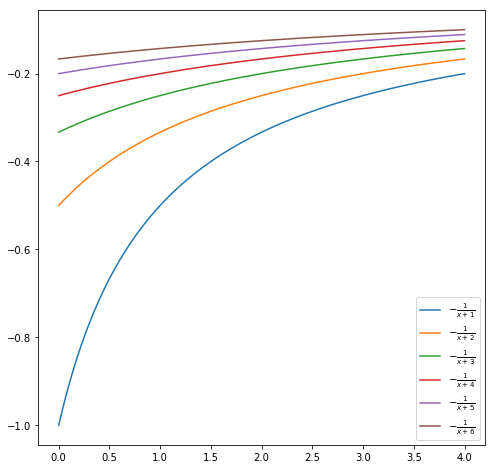

In [211]:
plt.figure(figsize=(8,8))

for c in range(1,7):
    SOLc = SOLk.subs([(sp.Symbol('C1'), c)])
    F = sp.lambdify(x, SOLc.args[1])
    dom = np.linspace(0, 4, 1000)
    ran = [F(p) for p in dom]
    plt.plot(dom, ran, label='$'+sp.latex(SOLc.args[1])+'$')
plt.legend()

## More Generally -- Solving ODES with sympy

At present, sympy's ode solving algorithm is basically a big *cookbook*-style database of formulas.  The key computational task sympy must perform is to recognise what type of differential equation you have provided it.  

Once it recognises the form from its cookbook, it follows standard procedures, which usually amount to either computing anti-derivatives, Fourier transforms, power series, etc. 

**Sympy has algorithms to solve:**

* First order ODEs that are: 
     - separable differential equations
     - differential equations whose coefficients homogeneous of the same order.
     - exact differential equations.
     - linear differential equations
     - Bernoulli differential equations.

* Second order ODEs that are:
    - Liouville differential equations.

* n-th order ODEs that are:
    - linear homogeneous differential equation with constant coefficients.
    - linear inhomogeneous differential equation with constant coefficients using the method of undetermined coefficients.
    - linear inhomogeneous differential equation with constant coefficients using the method of variation of parameters



In [217]:
y=sp.Function('y')
ODE = sp.Eq(y(x).diff(x) + ((3*x*y(x)+y(x)**2)/(x**2+x*y(x))), 0)

In [218]:
sp.pprint(ODE)

                       2       
d          3⋅x⋅y(x) + y (x)    
──(y(x)) + ──────────────── = 0
dx            2                
             x  + x⋅y(x)       


In [219]:
sp.classify_ode( ODE)

('1st_homogeneous_coeff_best',
 '1st_homogeneous_coeff_subs_indep_div_dep',
 '1st_homogeneous_coeff_subs_dep_div_indep',
 'lie_group',
 '1st_homogeneous_coeff_subs_indep_div_dep_Integral',
 '1st_homogeneous_coeff_subs_dep_div_indep_Integral')

In [220]:
sp.pprint(sp.dsolve(ODE))


⎡               _________                 _________⎤
⎢              ╱       4                 ╱       4 ⎥
⎢            ╲╱  C₁ + x                ╲╱  C₁ + x  ⎥
⎢y(x) = -x - ────────────, y(x) = -x + ────────────⎥
⎣                 x                         x      ⎦


In [221]:
sp.pprint(sp.dsolve(ODE, hint='1st_homogeneous_coeff_subs_dep_div_indep'))

⎡         ⎛     ________    ⎞           ⎛       ________    ⎞⎤
⎢         ⎜    ╱ C₁         ⎟           ⎜      ╱ C₁         ⎟⎥
⎢y(x) = x⋅⎜   ╱  ── + 1  - 1⎟, y(x) = x⋅⎜-    ╱  ── + 1  - 1⎟⎥
⎢         ⎜  ╱    4         ⎟           ⎜    ╱    4         ⎟⎥
⎣         ⎝╲╱    x          ⎠           ⎝  ╲╱    x          ⎠⎦
